In [209]:
#import library
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [210]:
#read data.csv
data = pd.read_csv('data.csv', encoding='utf-8', encoding_errors='ignore')
data.head()

Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0         1        1            0          0  
1         0        0            0          0  
2         0        0            0          0  
3         0        0            0          0  
4         0        0            1          0

In [211]:
#check jumlah data duplikat
data.duplicated().sum()

np.int64(132)

In [212]:
#drop data duplikat 
data = data.drop_duplicates()

In [213]:
#check jumlah data duplikat setelah di drop
data.duplicated().sum()

np.int64(0)

In [214]:
#check missing values 
data.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [215]:
#mengecek info kolom 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13037 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13037 non-null  object
 1   HS             13037 non-null  int64 
 2   Abusive        13037 non-null  int64 
 3   HS_Individual  13037 non-null  int64 
 4   HS_Group       13037 non-null  int64 
 5   HS_Religion    13037 non-null  int64 
 6   HS_Race        13037 non-null  int64 
 7   HS_Physical    13037 non-null  int64 
 8   HS_Gender      13037 non-null  int64 
 9   HS_Other       13037 non-null  int64 
 10  HS_Weak        13037 non-null  int64 
 11  HS_Moderate    13037 non-null  int64 
 12  HS_Strong      13037 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.4+ MB


In [216]:
#read abusive.csv
abuse = pd.read_csv("abusive.csv", encoding='utf-8', encoding_errors='ignore')
abuse

ABUSIVE
0           alay
1          ampas
2           buta
3        keparat
4         anjing
..           ...
120        rezim
121        sange
122       serbet
123        sipit
124  transgender

[125 rows x 1 columns]

In [217]:
#read new kamusalay.csv rename first column jadi non baku and baku 
alay = pd.read_csv("new_kamusalay.csv", encoding='utf-8', encoding_errors='ignore', header= None)
alay = alay.rename(columns={0: 'non-baku', 1: 'baku'})
alay

non-baku                               baku
0      anakjakartaasikasik           anak jakarta asyik asyik
1             pakcikdahtua                  pak cik sudah tua
2           pakcikmudalagi                  pak cik muda lagi
3              t3tapjokowi                       tetap jokowi
4                       3x                          tiga kali
...                    ...                                ...
15162            mendikbud  menteri pendidikan dan kebudayaan
15163               mendag                menteri perdagangan
15164              menaker               menteri tenaga kerja
15165             memetwit                            mentwit
15166             megangin                           memegang

[15167 rows x 2 columns]

In [218]:
#membuat kolom word count untuk kolom tweet 
def word_count(teks):
  kata_kata = teks.split()
  return len(kata_kata)
data["word_count"] = data['Tweet'].apply (word_count)
data

Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4      USER USER Kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13164  USER jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13165                       USER Kasur mana enak kunyuk'   0        1   
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13167  USER USER USER USER Bom yang real mudah terdet...   0        0   
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0                  1         0            0        0            0          0   
1                  0         0            0        0            0          0   
2                  0         0            0        0            0          0   
3                  0         0            0        0            0          0   
4                  0         1            1        0            0          0   
...              ...       ...          ...      ...          ...        ...   
13164              1         0            0        0            1          0   
13165              0         0            0        0            0          0   
13166              0         0            0        0            0          0   
13167              0         0            0        0            0          0   
13168              1         0            0        0            0          0   

       HS_Other  HS_Weak  HS_Moderate  HS_Strong  word_count  
0             1        1            0          0          25  
1             0        0            0          0          21  
2             0        0            0          0          37  
3             0        0            0          0          14  
4             0        0            1          0          14  
...         ...      ...          ...        ...         ...  
13164         0        1            0          0          10  
13165         0        0            0          0           5  
13166         0        0            0          0           9  
13167         0        0            0          0          22  
13168         1        1            0          0          10  

[13037 rows x 14 columns]

In [219]:
#membuat kolom total char untuk kolom tweet 
data['total_char'] = data['Tweet'].str.len()

In [220]:
#memberikan label positive dan negative 
def label(x):
    if x['HS'] == 1 and x['Abusive'] == 1:
        return 'Negative'
    elif x['HS'] == 1 and x['Abusive'] == 0:
        return 'Negative'
    elif x['HS'] == 0 and x['Abusive'] == 1:
        return 'Negative'
    else:
        return 'Positive'

data['Label'] = data.apply(label, axis=1)

In [221]:
data

Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4      USER USER Kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13164  USER jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13165                       USER Kasur mana enak kunyuk'   0        1   
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13167  USER USER USER USER Bom yang real mudah terdet...   0        0   
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0                  1         0            0        0            0          0   
1                  0         0            0        0            0          0   
2                  0         0            0        0            0          0   
3                  0         0            0        0            0          0   
4                  0         1            1        0            0          0   
...              ...       ...          ...      ...          ...        ...   
13164              1         0            0        0            1          0   
13165              0         0            0        0            0          0   
13166              0         0            0        0            0          0   
13167              0         0            0        0            0          0   
13168              1         0            0        0            0          0   

       HS_Other  HS_Weak  HS_Moderate  HS_Strong  word_count  total_char  \
0             1        1            0          0          25         138   
1             0        0            0          0          21         120   
2             0        0            0          0          37         254   
3             0        0            0          0          14          75   
4             0        0            1          0          14          89   
...         ...      ...          ...        ...         ...         ...   
13164         0        1            0          0          10          61   
13165         0        0            0          0           5          28   
13166         0        0            0          0           9          62   
13167         0        0            0          0          22         135   
13168         1        1            0          0          10          53   

          Label  
0      Negative  
1      Negative  
2      Positive  
3      Positive  
4      Negative  
...         ...  
13164  Negative  
13165  Negative  
13166  Positive  
13167  Positive  
13168  Negative  

[13037 rows x 16 columns]

In [222]:
#script untuk data cleansing 
def lower(text):
    return text.lower()
    
def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) 
    text = re.sub('\s+',' ',text)
    text = re.sub('\t+',' ',text)
    text = re.sub('rt',' ',text)
    text = re.sub('user',' ',text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text)
    text = re.sub('  +', ' ', text)
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub(r'\\x[0-9a-fA-F]{2}', '', text)
    text = re.sub(r'\bx[0-9a-fA-F]{1,2}\b', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

alay_dict = dict(zip(alay['non-baku'], alay['baku']))
def fix_alay(text):
    return ' '.join([alay_dict[word] if word in alay_dict else word for word in text.split(' ')])

abuse_dict = dict(zip(abuse['ABUSIVE'], [''] * len(abuse)))
def fix_abusive(text):
    return ' '.join([abuse_dict[word] if word in abuse_dict else word for word in text.split(' ')])

In [223]:
#mengumpulkan semua script tersebut ke satu def 
def preprocess(text):
    text = lower(text)
    text = remove_unnecessary_char(text)
    text = remove_nonaplhanumeric(text)
    text = fix_alay(text)
    text = fix_abusive(text)
    return text

In [224]:
#apply def preprocess dan membuat kolom baru bernama tweet bersih
data['Tweet bersih']= data['Tweet'].apply(preprocess)
data

Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4      USER USER Kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13164  USER jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13165                       USER Kasur mana enak kunyuk'   0        1   
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13167  USER USER USER USER Bom yang real mudah terdet...   0        0   
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0                  1         0            0        0            0          0   
1                  0         0            0        0            0          0   
2                  0         0            0        0            0          0   
3                  0         0            0        0            0          0   
4                  0         1            1        0            0          0   
...              ...       ...          ...      ...          ...        ...   
13164              1         0            0        0            1          0   
13165              0         0            0        0            0          0   
13166              0         0            0        0            0          0   
13167              0         0            0        0            0          0   
13168              1         0            0        0            0          0   

       HS_Other  HS_Weak  HS_Moderate  HS_Strong  word_count  total_char  \
0             1        1            0          0          25         138   
1             0        0            0          0          21         120   
2             0        0            0          0          37         254   
3             0        0            0          0          14          75   
4             0        0            1          0          14          89   
...         ...      ...          ...        ...         ...         ...   
13164         0        1            0          0          10          61   
13165         0        0            0          0           5          28   
13166         0        0            0          0           9          62   
13167         0        0            0          0          22         135   
13168         1        1            0          0          10          53   

          Label                                       Tweet bersih  
0      Negative  di saat semua cowok berusaha melacak perhatian...  
1      Negative  siapa yang telat memberi tau eluedan  gue berg...  
2      Positive  41 kadang aku berpikir kenapa aku tetap percay...  
3      Positive  aku itu akunnku tau matamu  tapi dilihat dari ...  
4      Negative  kaum   sudah kelihatan dongoknya dari awal tam...  
...         ...                                                ...  
13164  Negative  jangan asal berbicara ndasmu  kamu yang sekata...  
13165  Negative                                   kasur mana enak   
13166  Positive                       hati hati  gnnlagi bosan duh  
13167  Positive  bom yang real mudah terdeteksi bom yang terkub...  
13168  Negative          mana situ memberi itu cuma foto ya kutil   

[13037 rows x 17 columns]

In [225]:
#membuat kolom word count bersih 
def word_count(teks):
  kata = teks.split()
  return len(kata)
data["word_count_bersih"] = data['Tweet bersih'].apply (word_count)
data

Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4      USER USER Kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13164  USER jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13165                       USER Kasur mana enak kunyuk'   0        1   
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13167  USER USER USER USER Bom yang real mudah terdet...   0        0   
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0                  1         0            0        0            0          0   
1                  0         0            0        0            0          0   
2                  0         0            0        0            0          0   
3                  0         0            0        0            0          0   
4                  0         1            1        0            0          0   
...              ...       ...          ...      ...          ...        ...   
13164              1         0            0        0            1          0   
13165              0         0            0        0            0          0   
13166              0         0            0        0            0          0   
13167              0         0            0        0            0          0   
13168              1         0            0        0            0          0   

       HS_Other  HS_Weak  HS_Moderate  HS_Strong  word_count  total_char  \
0             1        1            0          0          25         138   
1             0        0            0          0          21         120   
2             0        0            0          0          37         254   
3             0        0            0          0          14          75   
4             0        0            1          0          14          89   
...         ...      ...          ...        ...         ...         ...   
13164         0        1            0          0          10          61   
13165         0        0            0          0           5          28   
13166         0        0            0          0           9          62   
13167         0        0            0          0          22         135   
13168         1        1            0          0          10          53   

          Label                                       Tweet bersih  \
0      Negative  di saat semua cowok berusaha melacak perhatian...   
1      Negative  siapa yang telat memberi tau eluedan  gue berg...   
2      Positive  41 kadang aku berpikir kenapa aku tetap percay...   
3      Positive  aku itu akunnku tau matamu  tapi dilihat dari ...   
4      Negative  kaum   sudah kelihatan dongoknya dari awal tam...   
...         ...                                                ...   
13164  Negative  jangan asal berbicara ndasmu  kamu yang sekata...   
13165  Negative                                   kasur mana enak    
13166  Positive                       hati hati  gnnlagi bosan duh   
13167  Positive  bom yang real mudah terdeteksi bom yang terkub...   
13168  Negative          mana situ memberi itu cuma foto ya kutil    

       word_count_bersih  
0                     21  
1                     17  
2                     38  
3                     11  
4                      9  
...                  ...  
13164                  8  
13165                  3  
13166                  5  
13167                 18  
13168                  8  

[13037 rows x 18 columns]

In [226]:
#membuat kolom total char untuk kolom tweet bersih 
data['total_char2'] = data['Tweet bersih'].str.len()
data

Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4      USER USER Kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13164  USER jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13165                       USER Kasur mana enak kunyuk'   0        1   
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13167  USER USER USER USER Bom yang real mudah terdet...   0        0   
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0                  1         0            0        0            0          0   
1                  0         0            0        0            0          0   
2                  0         0            0        0            0          0   
3                  0         0            0        0            0          0   
4                  0         1            1        0            0          0   
...              ...       ...          ...      ...          ...        ...   
13164              1         0            0        0            1          0   
13165              0         0            0        0            0          0   
13166              0         0            0        0            0          0   
13167              0         0            0        0            0          0   
13168              1         0            0        0            0          0   

       HS_Other  HS_Weak  HS_Moderate  HS_Strong  word_count  total_char  \
0             1        1            0          0          25         138   
1             0        0            0          0          21         120   
2             0        0            0          0          37         254   
3             0        0            0          0          14          75   
4             0        0            1          0          14          89   
...         ...      ...          ...        ...         ...         ...   
13164         0        1            0          0          10          61   
13165         0        0            0          0           5          28   
13166         0        0            0          0           9          62   
13167         0        0            0          0          22         135   
13168         1        1            0          0          10          53   

          Label                                       Tweet bersih  \
0      Negative  di saat semua cowok berusaha melacak perhatian...   
1      Negative  siapa yang telat memberi tau eluedan  gue berg...   
2      Positive  41 kadang aku berpikir kenapa aku tetap percay...   
3      Positive  aku itu akunnku tau matamu  tapi dilihat dari ...   
4      Negative  kaum   sudah kelihatan dongoknya dari awal tam...   
...         ...                                                ...   
13164  Negative  jangan asal berbicara ndasmu  kamu yang sekata...   
13165  Negative                                   kasur mana enak    
13166  Positive                       hati hati  gnnlagi bosan duh   
13167  Positive  bom yang real mudah terdeteksi bom yang terkub...   
13168  Negative          mana situ memberi itu cuma foto ya kutil    

       word_count_bersih  total_char2  
0                     21          129  
1                     17          100  
2                     38          250  
3                     11           58  
4                      9           60  
...                  ...          ...  
13164                  8           52  
13165                  3           16  
13166                  5           28  
13167                 18          114  
13168              

Menghitung mean, median, dan mode

In [227]:
data[['total_char', 'word_count']].sum()

total_char    1487225
word_count     225142
dtype: int64

In [228]:
data[['total_char', 'word_count']].mean()

total_char    114.077242
word_count     17.269464
dtype: float64

In [229]:
data[['total_char', 'word_count']].median()

total_char    100.0
word_count     15.0
dtype: float64

In [230]:
data[['total_char', 'word_count']].mode()

total_char  word_count
0         254          11

In [250]:
data[['total_char2', 'word_count_bersih']].sum()

total_char2          1392094
word_count_bersih     211577
dtype: int64

In [231]:
data[['total_char2', 'word_count_bersih']].mean()

total_char2          106.780241
word_count_bersih     16.228964
dtype: float64

In [232]:
data[['total_char2', 'word_count_bersih']].median()

total_char2          92.0
word_count_bersih    14.0
dtype: float64

In [249]:
data[['total_char2', 'word_count_bersih']].mode()

total_char2  word_count_bersih
0         46.0                  9
1          NaN                 13

Visualisasi Data

In [238]:
data.groupby('Label').Label.count().plot(kind='pie')

<Axes: ylabel='Label'>

<Axes: >

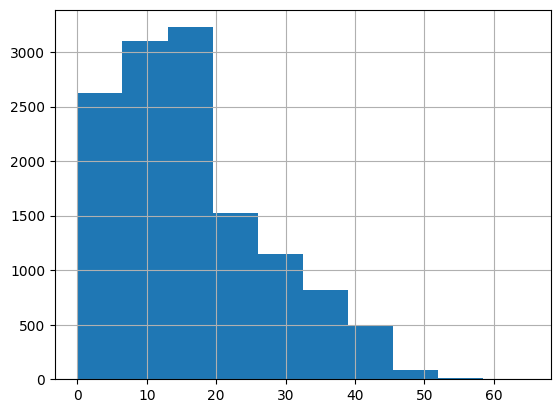

In [239]:
data.word_count_bersih.hist()

In [240]:
data.word_count.hist()

<Axes: >

<Axes: >

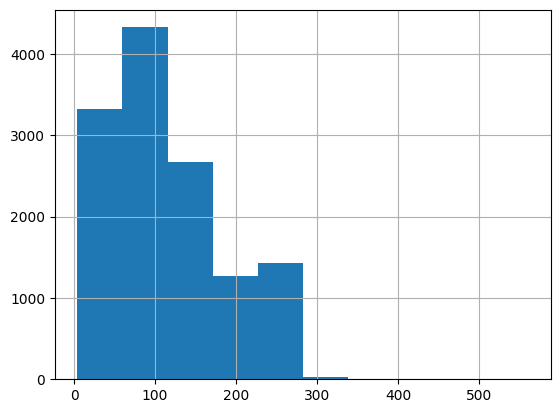

In [251]:
data.total_char.hist()

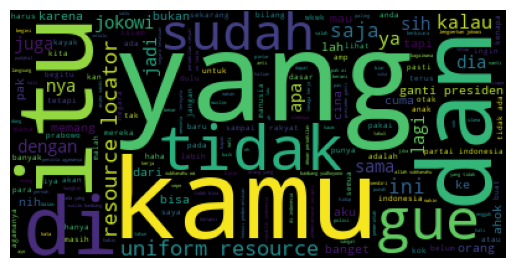

In [241]:
data_negative = data.loc[data['Label'] == 'Negative']
text = ' '.join(data_negative['Tweet bersih'])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

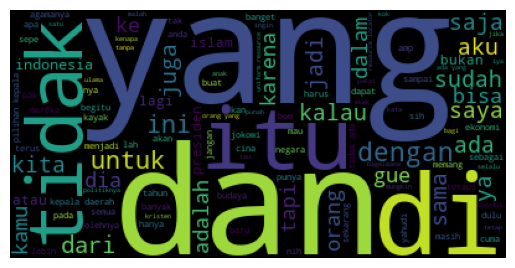

In [242]:
data_negative = data.loc[data['Label'] == 'Positive']
text = ' '.join(data_negative['Tweet bersih'])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

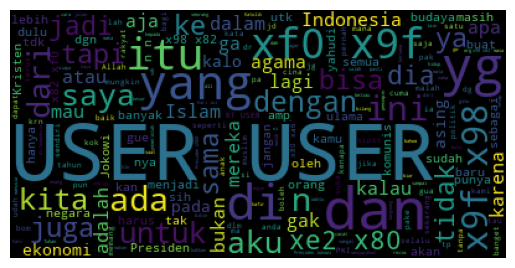

In [243]:
data_positive = data.loc[data['Label'] == 'Negative']
text = ' '.join(data_negative['Tweet'])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

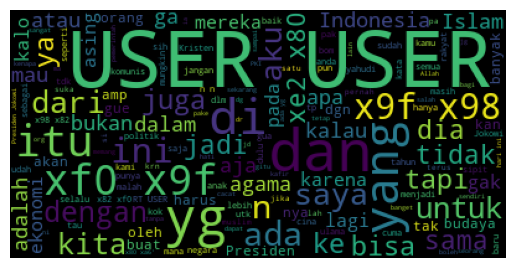

In [244]:
data_positive = data.loc[data['Label'] == 'Positive']
text = ' '.join(data_negative['Tweet'])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<Axes: xlabel='word_count', ylabel='word_count_bersih'>

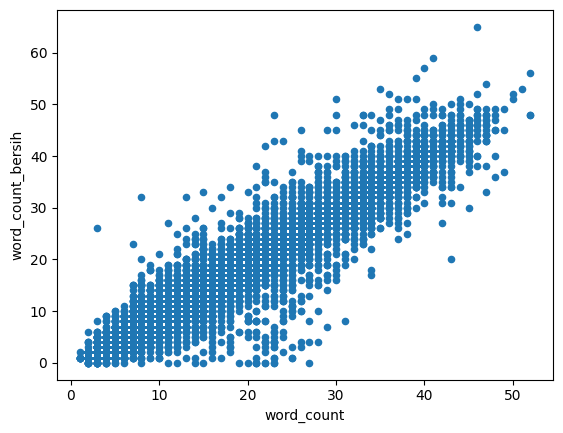

In [245]:
data.plot(x='word_count',y='word_count_bersih', kind= 'scatter')

<Axes: xlabel='total_char', ylabel='total_char2'>

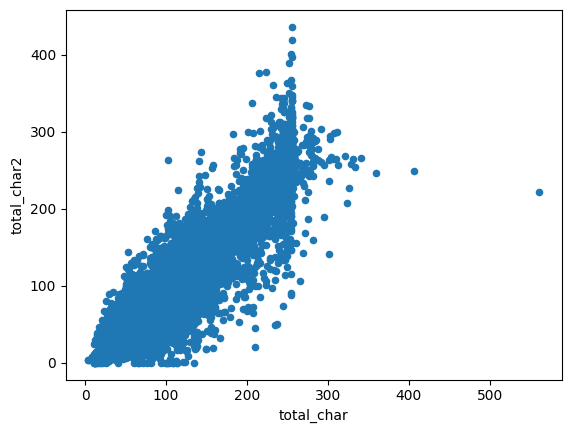

In [254]:
data.plot(x='total_char',y='total_char2', kind= 'scatter')

<Axes: xlabel='Label'>

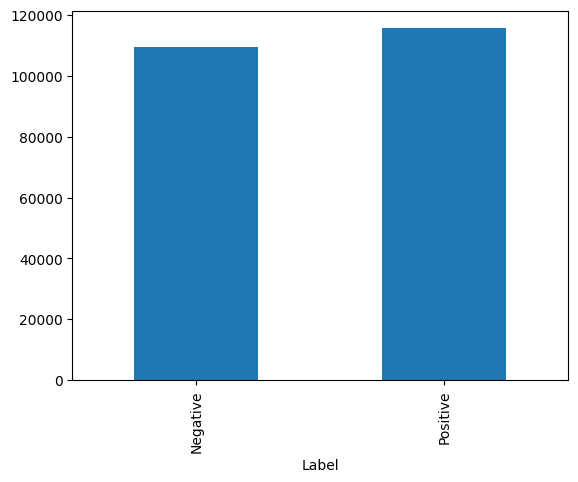

In [246]:
data.groupby('Label').word_count.sum().plot(kind='bar')

<Axes: xlabel='Label'>

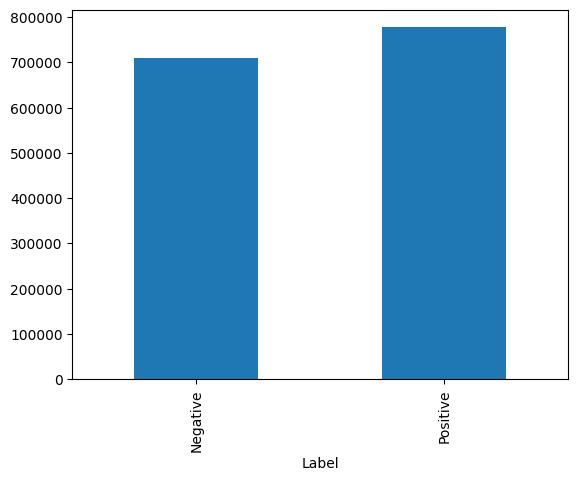

In [252]:
data.groupby('Label').total_char.sum().plot(kind='bar')

<Axes: xlabel='Label'>

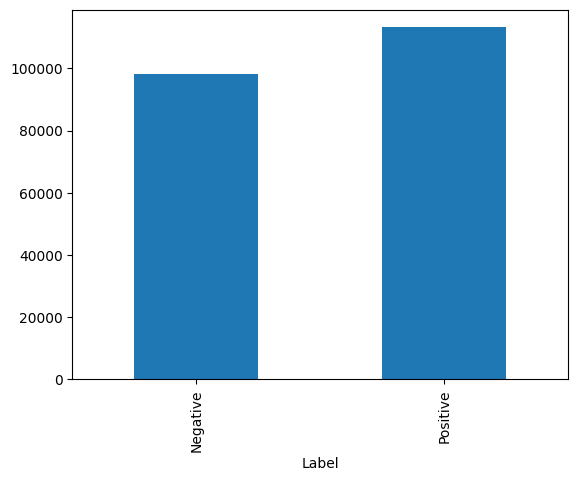

In [247]:
data.groupby('Label').word_count_bersih.sum().plot(kind='bar')

In [253]:
data.groupby('Label').total_char2.sum().plot(kind='bar')

<Axes: xlabel='Label'>